In [2]:
Dataset_path="/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/"
Train_path="/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/"

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import glob
dataset_images=glob.glob(f"{Train_path}**/*.tif")
dataset_images[:5]

['/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_10.tif',
 '/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_17.tif',
 '/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_1_mask.tif',
 '/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_21.tif',
 '/content/drive/MyDrive/Medical Image Segmentation/lgg-mri-segmentation/kaggle_3m/TCGA_HT_A61A_20000127/TCGA_HT_A61A_20000127_18.tif']

In [27]:
import os

#Functions to get extract the patients ID and whether the image is a masked image
def get_patient_id(image_paths):
    patient_ids = []
    for path in image_paths:
        path_list = path.split('/')[-2:]
        patient_id = None
        for item in path_list:
            if item.startswith('TCGA'):
                patient_id = item
                break
        patient_ids.append(patient_id)
    return patient_ids

def get_sample_number(image_paths):
    sample_numbers = []
    is_mask = []

    for path in image_paths:
        path_list = path.split('/')[-2:][1].split('_')
        if 'mask.tif' in path_list:
            sample_number = int(''.join(filter(str.isdigit, path_list[-2])))
            is_mask.append(1)
        else:
            sample_number = int(''.join(filter(str.isdigit, path_list[-1].split('.')[0])))
            is_mask.append(0)

        sample_numbers.append(sample_number)

    return sample_numbers, is_mask

In [28]:
import pandas as pd
def build_df(image_paths):
    sample_numbers,mask_label=get_sample_number(image_paths)

    df=pd.DataFrame({
        'id':sample_numbers,
        'patient':get_patient_id(image_paths),
        'image_path':image_paths,
        'is_mask':mask_label
    })

    return df

In [29]:
#building the dataframe with the masks and no masks
df = (build_df(dataset_images).sort_values(by=['id', 'patient', 'image_path']).reset_index(drop=True))
df

,id,patient,image_path,is_mask
0,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...,0
1,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...,1
2,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...,0
3,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...,1
4,1,TCGA_CS_4943_20000902,/content/drive/MyDrive/Medical Image Segmentat...,0
...,...,...,...,...
7859,88,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...,1
7860,88,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,0
7861,88,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,1
7862,181,TCGA_HT_7692_19960724,/content/drive/MyDrive/Medical Image Segmentat...,0


In [30]:
grouped_df = df.groupby(by='is_mask')

images_df, mask_df = (
    grouped_df.get_group(0).drop('is_mask', axis=1).reset_index(drop=True),
    grouped_df.get_group(1).drop('is_mask', axis=1).reset_index(drop=True)
)
mask_df = mask_df.rename({'image_path': 'mask_path'}, axis=1)

mask_df

,id,patient,mask_path
0,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...
1,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...
2,1,TCGA_CS_4943_20000902,/content/drive/MyDrive/Medical Image Segmentat...
3,1,TCGA_CS_4944_20010208,/content/drive/MyDrive/Medical Image Segmentat...
4,1,TCGA_CS_5393_19990606,/content/drive/MyDrive/Medical Image Segmentat...
...,...,...,...
3924,86,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...
3925,87,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...
3926,87,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...
3927,88,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...


In [31]:
images_df

,id,patient,image_path
0,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...
1,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...
2,1,TCGA_CS_4943_20000902,/content/drive/MyDrive/Medical Image Segmentat...
3,1,TCGA_CS_4944_20010208,/content/drive/MyDrive/Medical Image Segmentat...
4,1,TCGA_CS_5393_19990606,/content/drive/MyDrive/Medical Image Segmentat...
...,...,...,...
3930,87,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...
3931,88,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...
3932,88,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...
3933,181,TCGA_HT_7692_19960724,/content/drive/MyDrive/Medical Image Segmentat...


In [34]:
import numpy as np
from PIL import Image
def _load(image_path, as_tensor=True):
    image = Image.open(image_path)
    return np.array(image).astype(np.float32) / 255.

#Since the mask images are Black and white with white showing tumour
def generate_label(mask_path, load_fn):
    mask = load_fn(mask_path)
    if mask.max() > 0:
        return 1 # Brain Tumor Present
    return 0 # Normal

In [35]:
from tqdm import tqdm
ds=pd.merge(images_df,mask_df,on=['id','patient'])
ds

,id,patient,image_path,mask_path
0,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
1,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
2,1,TCGA_CS_4943_20000902,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
3,1,TCGA_CS_4944_20010208,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
4,1,TCGA_CS_5393_19990606,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
...,...,...,...,...
3928,86,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
3929,87,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
3930,87,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...
3931,88,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...


In [36]:
ds['diagnosis'] = [generate_label(_, _load) for _ in tqdm(ds['mask_path'])]
ds

100%|██████████| 3933/3933 [28:15<00:00,  2.32it/s]


,id,patient,image_path,mask_path,diagnosis
0,1,TCGA_CS_4941_19960909,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
1,1,TCGA_CS_4942_19970222,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
2,1,TCGA_CS_4943_20000902,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
3,1,TCGA_CS_4944_20010208,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
4,1,TCGA_CS_5393_19990606,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
...,...,...,...,...,...
3928,86,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
3929,87,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
3930,87,TCGA_HT_A61B_19991127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
3931,88,TCGA_HT_A61A_20000127,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0


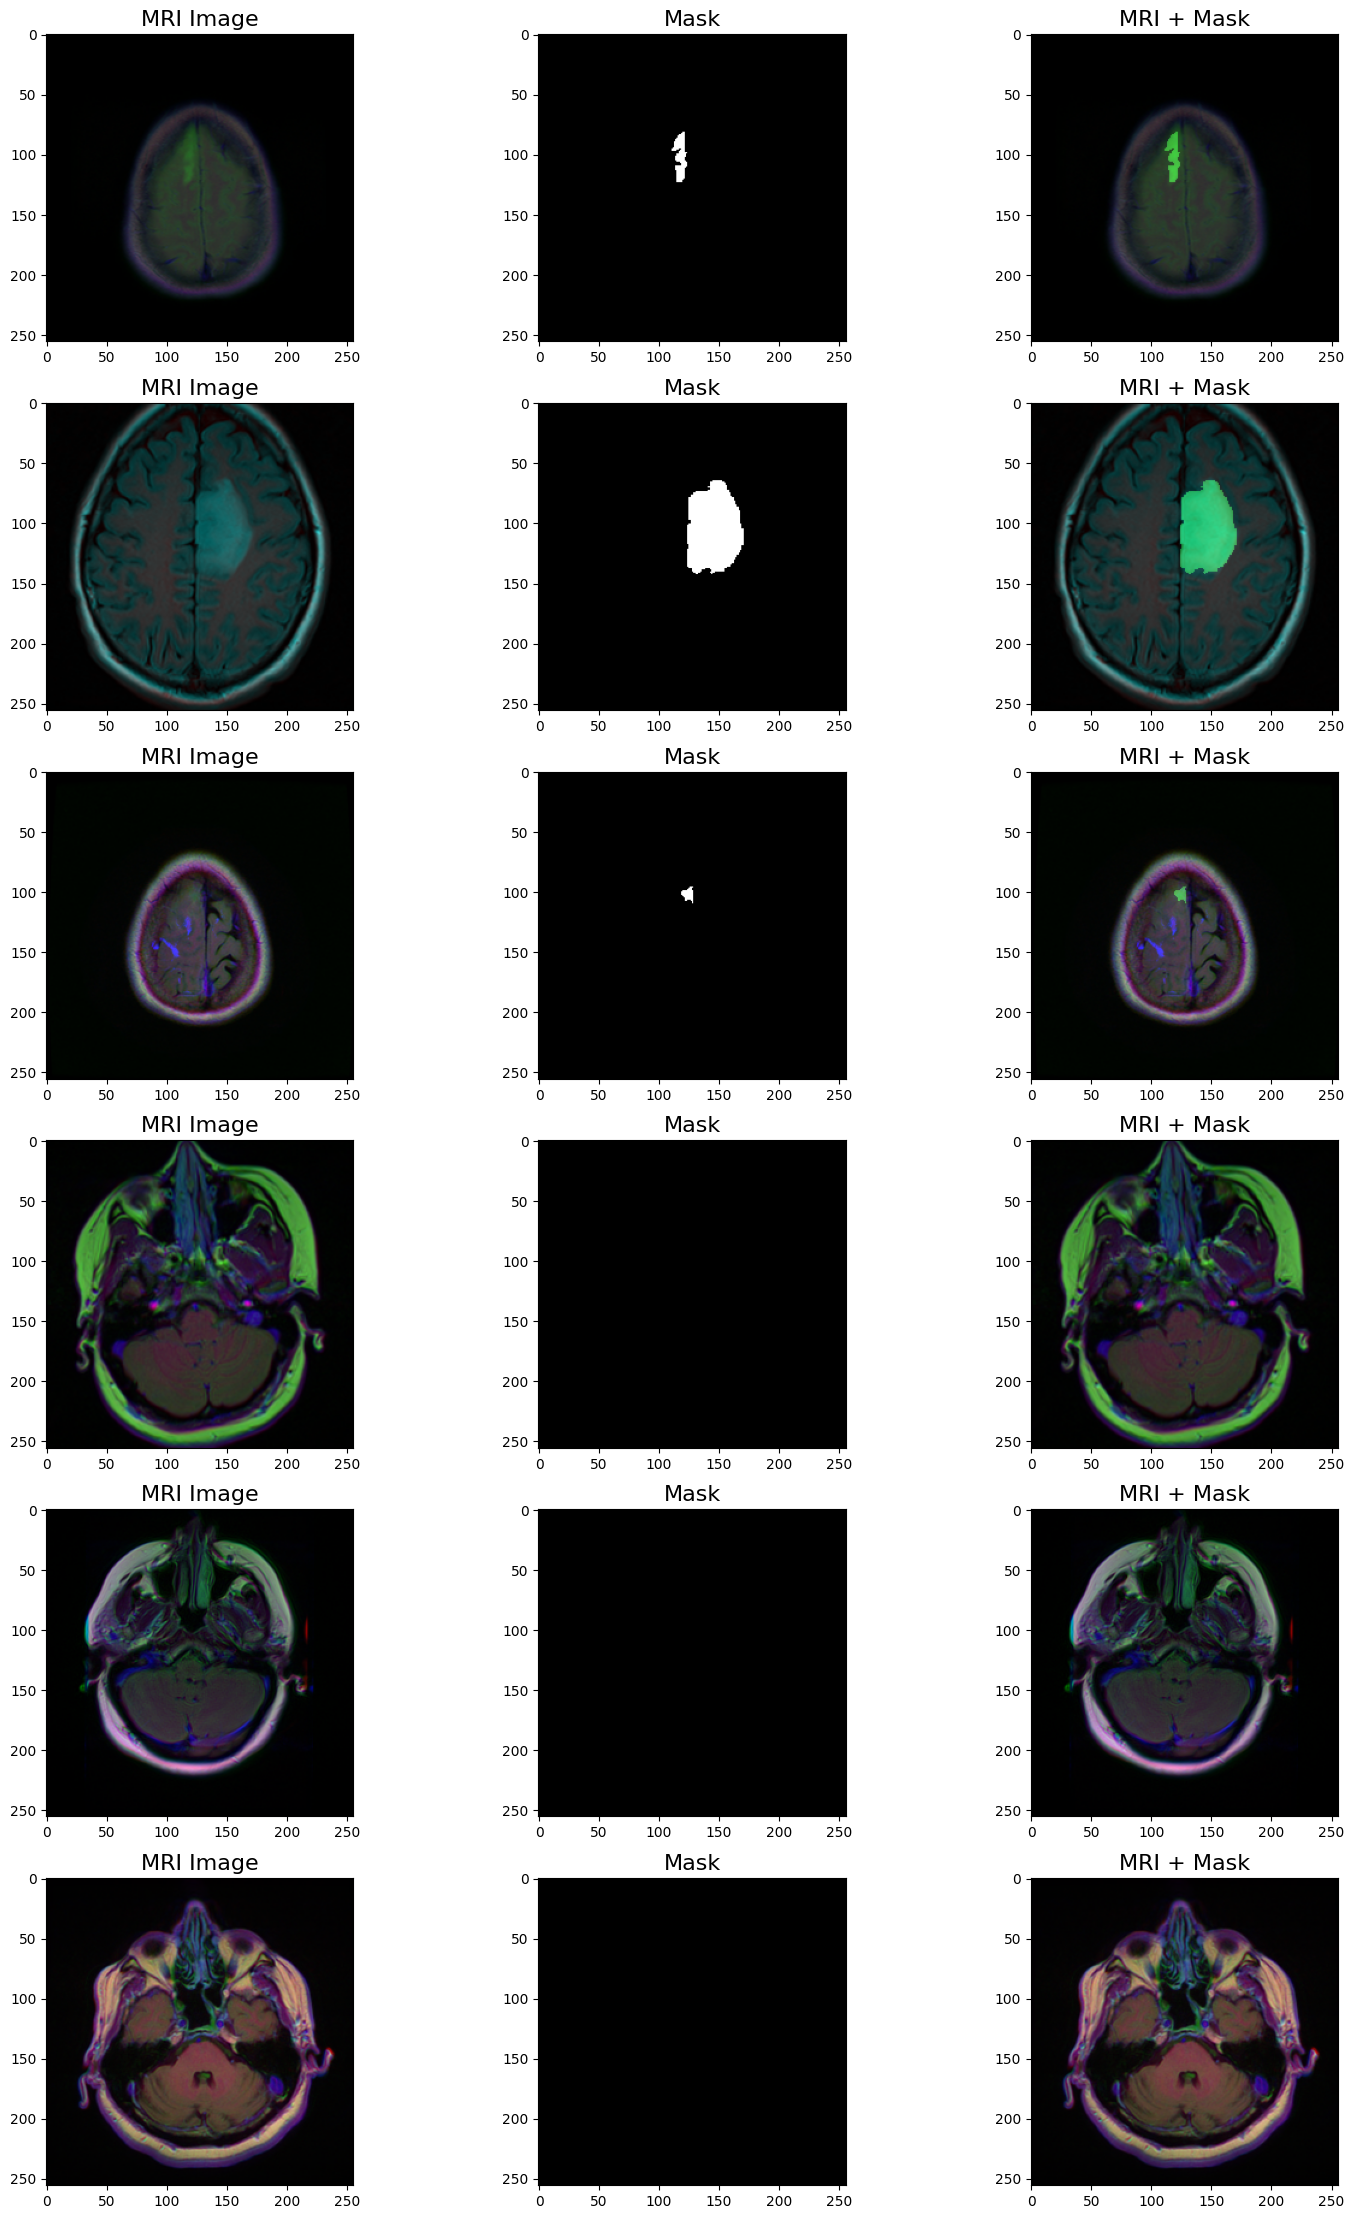

In [37]:
import random
import matplotlib.pyplot as plt
def view_mulitiple_samples(df, sample_loader, count=10, color_map='rgb', fig_size=(14, 10), title_size=16):
    idx = random.sample(df.index.to_list(), count)

    fig = plt.figure(figsize=fig_size)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)

    for row, _ in enumerate(idx):
        image, mask = (
            sample_loader(df.image_path[_]),
            sample_loader(df.mask_path[_])
        )

        idx = 3 * (row + 1)
        plt.subplot(count+1, 3, idx + 1)
        plt.title(f'MRI Image', fontsize=title_size)
        if color_map=='rgb':
            plt.imshow(image)
        else:
            plt.imshow(image, cmap=color_map)
        plt.subplot(count+1, 3, idx + 2)
        plt.title(f'Mask', fontsize=title_size)
        plt.imshow(mask, cmap='gray')

        plt.subplot(count+1, 3, idx + 3)
        gen_mask = np.dstack([mask*0.1, mask*0.4, mask*0.1])
        plt.title(f'MRI + Mask', fontsize=title_size)
        if color_map=='rgb':
            plt.imshow(image + gen_mask)
        else:
            plt.imshow(image + gen_mask, cmap=color_map)

    return

view_mulitiple_samples(
    ds, _load,
    count=6,
    fig_size=(18, 30)
)


In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is named df
# Splitting into train and (val + test)
train_val_test, test = train_test_split(ds, test_size=0.15, random_state=42)
# Splitting val from train_val_test
train, val = train_test_split(train_val_test, test_size=0.10/0.85, random_state=42)

# Checking lengths to ensure correct split
print("Train set length:", len(train))
print("Validation set length:", len(val))
print("Test set length:", len(test))

Train set length: 2949
Validation set length: 394
Test set length: 590


In [40]:
train.to_csv('/content/drive/MyDrive/Medical Image Segmentation/train.csv', index=False)
val.to_csv('/content/drive/MyDrive/Medical Image Segmentation/val.csv', index=False)
test.to_csv('/content/drive/MyDrive/Medical Image Segmentation/test.csv', index=False)

In [41]:
import pandas as pd
train_df=pd.read_csv('/content/drive/MyDrive/Medical Image Segmentation/train.csv')
train_df

,id,patient,image_path,mask_path,diagnosis
0,16,TCGA_HT_7855_19951020,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,1
1,11,TCGA_FG_6688_20020215,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
2,57,TCGA_DU_6407_19860514,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
3,22,TCGA_DU_5855_19951217,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,1
4,4,TCGA_CS_6668_20011025,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
...,...,...,...,...,...
2944,16,TCGA_DU_6401_19831001,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
2945,18,TCGA_FG_A4MU_20030903,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,1
2946,35,TCGA_DU_8162_19961029,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
2947,2,TCGA_DU_8164_19970111,/content/drive/MyDrive/Medical Image Segmentat...,/content/drive/MyDrive/Medical Image Segmentat...,0
